In [1]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [2]:
from shared.enums import SegmentationStrategy
from utils.plot_utils import plot_image_grid
from utils.dataloader_utils import get_dataloder_from_strategy

Using device: mps
Using device: cpu


# (DEPRECATED) SEGMENTATION - SegmentedDataLoader (ground truth, non dynamic)

## With background

In [3]:
# strategy = SegmentationStrategy.SEGMENTATION.value
# dataloader = get_dataloder_from_strategy(
#         strategy=strategy,
#         normalize=False,
#         keep_background=True)
# train_dataloader = dataloader.get_train_dataloder()
# batch = next(iter(train_dataloader))
# images, labels = batch
# plot_image_grid(images, "Segmented Images with background")


## Without Background

In [4]:
# strategy = SegmentationStrategy.SEGMENTATION.value
# dataloader = get_dataloder_from_strategy(
#     strategy=strategy,
#     normalize=False,
#     keep_background=False)
# train_dataloader = dataloader.get_train_dataloder()
# batch = next(iter(train_dataloader))
# images, labels = batch
# plot_image_grid(images, "Segmented Images without background")

# NO_SEGMENTATION - ImagesAndLabelsDataLoader

Using device: mps
LOADED METADATA HAS LENGTH 10015
---TRAIN---: 7660 entries
---VAL---: 852 entries
---TEST---: 1503 entries
Using device: mps
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 5129 images.
--Data Balance-- The second common class is 2 with 851 images with a difference of 4278 images from the most common class.
--Data Balance (Undersampling)-- Keeping 2564 from 0 class..
--Data Balance (Undersampling)-- 0 now has 2564 images
-- Data Balance (Oversampling) -- Adding 1713 from 2 class..
-- Data Balance (Oversampling) -- Adding 1723 from 1 class..
-- Data Balance (Oversampling) -- Adding 2171 from 4 class..
-- Data Balance (Oversampling) -- Adding 2314 from 3 class..
-- Data Balance (Oversampling) -- Adding 2456 from 6 class..
-- Data Balance (Oversampling) -- Adding 2476 from 5 class..


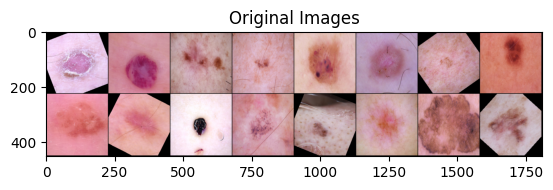

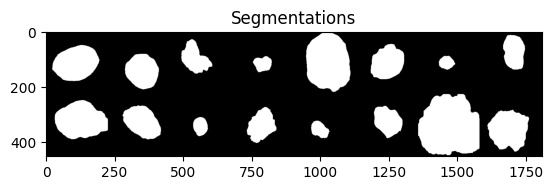

Using device: mps


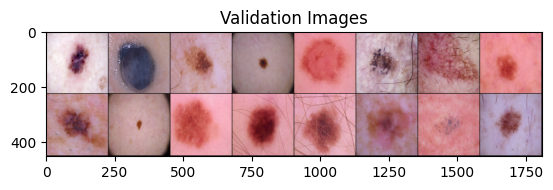

In [5]:
from constants import IMAGENET_STATISTICS


strategy = SegmentationStrategy.NO_SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
    strategy=strategy,
    normalize=False,
    batch_size=16,
    normalization_statistics=IMAGENET_STATISTICS)
train_dataloader = dataloader.get_train_dataloder()
batch = next(iter(train_dataloader))
images, labels, segmentations = batch
plot_image_grid(images, "Original Images")
plot_image_grid(segmentations, "Segmentations")
val_dataloader = dataloader.get_val_dataloader()
batch = next(iter(val_dataloader))
images, labels = batch
plot_image_grid(images, "Validation Images")

# DYNAMIC_SEGMENTATION - DynamicSegmentationDataLoader

Note: this is pretty bugged!

## DynamicSegmentationStrategy.OPENCV

Using device: mps
LOADED METADATA HAS LENGTH 10015
---TRAIN---: 7660 entries
---VAL---: 852 entries
---TEST---: 1503 entries
Using device: mps
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 5129 images.
--Data Balance-- The second common class is 2 with 851 images with a difference of 4278 images from the most common class.
--Data Balance (Undersampling)-- Keeping 2564 from 0 class..
--Data Balance (Undersampling)-- 0 now has 2564 images
-- Data Balance (Oversampling) -- Adding 1713 from 2 class..
-- Data Balance (Oversampling) -- Adding 1723 from 1 class..
-- Data Balance (Oversampling) -- Adding 2171 from 4 class..
-- Data Balance (Oversampling) -- Adding 2314 from 3 class..
-- Data Balance (Oversampling) -- Adding 2456 from 6 class..
-- Data Balance (Oversampling) -- Adding 2476 from 5 class..


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


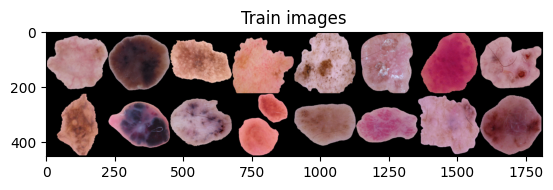

Using device: mps


/Users/dov/miniconda3/envs/aml_project/lib/python3.10/site-packages/torch/nn/functional.py:4006: UserWarning: The operator 'aten::upsample_linear1d.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  return torch._C._nn.upsample_linear1d(input, output_size, align_corners, scale_factors)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Min and max of validation images -0.21884141862392426 1.1242241859436035


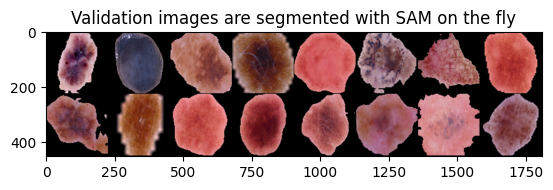

In [6]:
from shared.enums import DynamicSegmentationStrategy


strategy = SegmentationStrategy.DYNAMIC_SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
    strategy=strategy,
    dynamic_segmentation_strategy=DynamicSegmentationStrategy.SAM.value,
    normalize=False,
    batch_size=16,
    normalization_statistics=IMAGENET_STATISTICS,
    keep_background=False,
    take_val_from_test=False)
train_dataloader = dataloader.get_train_dataloder()
batch = next(iter(train_dataloader))
images, labels = batch
plot_image_grid(images, "Train images") 
val_dataloader = dataloader.get_val_dataloader()
batch = next(iter(val_dataloader))
images, labels = batch
print(f"Min and max of validation images {images.min()} {images.max()}")
plot_image_grid(images, "Validation images are segmented with SAM on the fly")